## Seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
path = ''
df = pd.read_csv(path + '/winequality-red.csv') # ,sep=';')

In [3]:
# ! pip install squarify
# ! pip install --upgrade pip

In [4]:
#df.columns
#df['quality'] = df['quality'].astype(int)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='sulphates', ylabel='Count'>

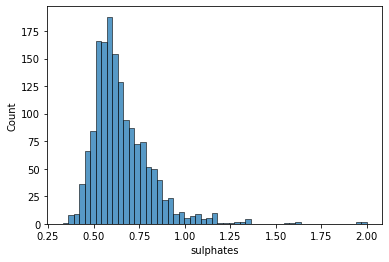

In [7]:
sns.histplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

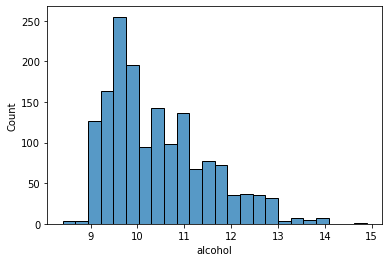

In [8]:
sns.histplot(df['alcohol'])

<AxesSubplot:>

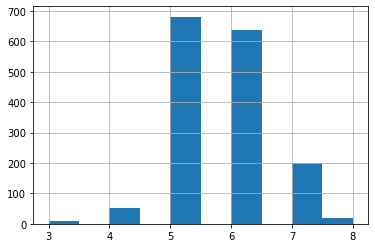

In [9]:
df['quality'].hist()

In [10]:
df['sulphates_rank'] = pd.qcut(df['sulphates'],2)
df['sulphates_rank'].value_counts()

(0.329, 0.62]    829
(0.62, 2.0]      770
Name: sulphates_rank, dtype: int64

In [11]:
df['alcohol_rank'] = pd.qcut(df['alcohol'],2)
df['alcohol_rank'].value_counts()

(8.399000000000001, 10.2]    842
(10.2, 14.9]                 757
Name: alcohol_rank, dtype: int64

In [12]:
#df['volatile_acidity_rank'] = pd.qcut(df['volatile acidity'],2)
#df['volatile_acidity_rank'].value_counts()

In [13]:
Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

### Show the distribution of X
* Bar chart
* Pie chart
* histogram

###  Show the distribution of Y by another categorical variable X
* Boxplot
* ridge plot
* Violin plot (hue for one more variable)
* Swarmplot (hue for one more variable)

### Show the interactions of two variables
* Bubble chart
* Scatterplot: joint distributions
* Scatterplot: with a linear regression
* Density plot

### Histogram chart

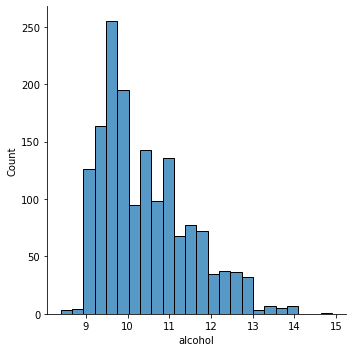

In [16]:
ax = sns.displot(df['alcohol'])

## Scatterplot: marginal distribution

### Joint Distributions: Hexbin plot with marginal distributions

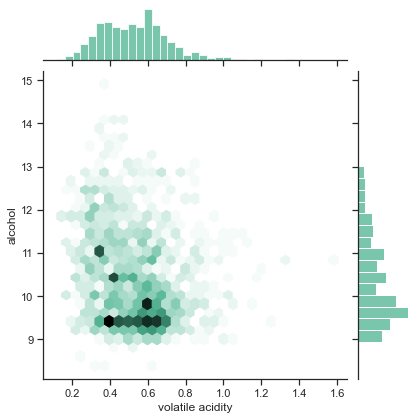

In [20]:
import seaborn as sns
sns.set(style="ticks")
sns.jointplot(x='volatile acidity', y='alcohol', data = df, kind="hex", color="#4CB391")

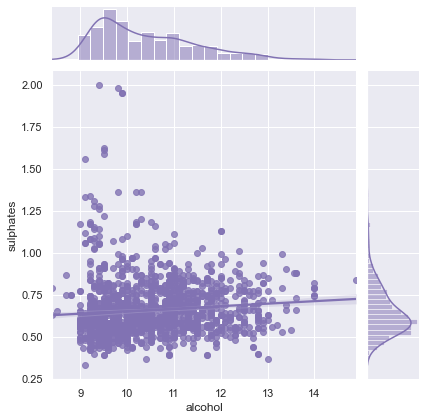

In [24]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.jointplot(x = "alcohol", y = "sulphates", data=df, kind="reg",
                  #xlim=(0, 60), ylim=(0, 12),
                  color="m", height=6)

## Boxplot with large distribution

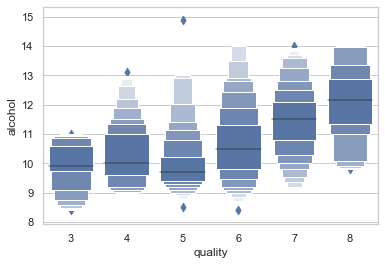

In [24]:
import seaborn as sns
sns.set(style="whitegrid")

sns.boxenplot(x="quality", y="alcohol",
              color="b", 
              scale="linear", data=df)

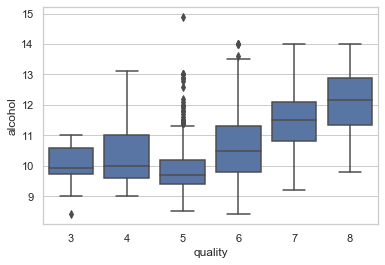

In [25]:
import seaborn as sns
sns.set(style="whitegrid")

sns.boxplot(x="quality", y="alcohol",
              color="b",  data=df)

### Ridge plot

/Users/chriskuo/opt/anaconda3/envs/AD/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


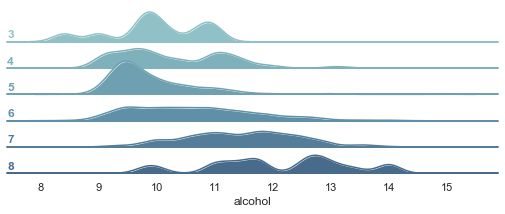

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="quality", hue="quality", 
                  aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "alcohol", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "alcohol")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

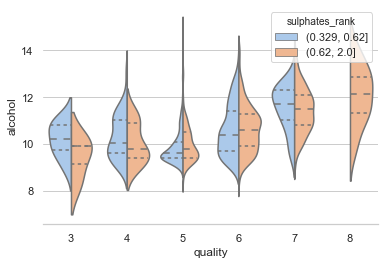

In [27]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="quality", y="alcohol",  hue="sulphates_rank",
               split=True, inner="quart",
               data=df)
sns.despine(left=True)

## Swarmplot: scatterplot by categorical variables

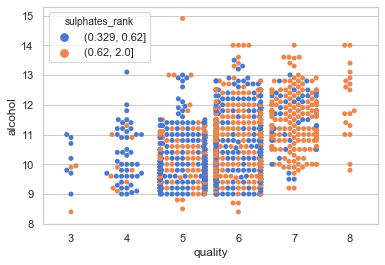

In [28]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="quality", y="alcohol", hue="sulphates_rank",
              data=df)

### Scatterplot like a bubble chart

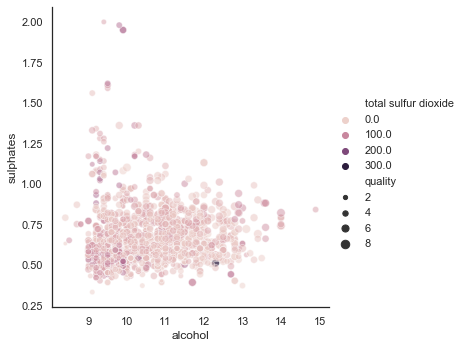

In [39]:
sns.set(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="alcohol", 
            y="sulphates", 
            hue="quality", 
            size="quality",
            #sizes=(1, 400), 
            alpha=0.5, 
            #palette="muted",
            #height=6, 
            data=df)

### Density plot

/Users/chriskuo/opt/anaconda3/envs/AD/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'height'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


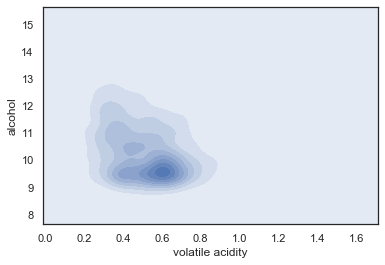

In [32]:
x=df['volatile acidity'] 
y=df['alcohol']
sns.kdeplot(x, y, 
            #cmap=cmap, 
            shade=True,
            height=4,
            #cut=5 
           ) #, ax=ax)
#ax.set()

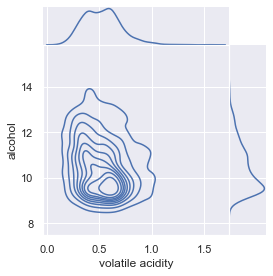

In [23]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(x='volatile acidity', y='alcohol',data=df, kind="kde",
                  height=4, space=0)

## Seaborn pairplot

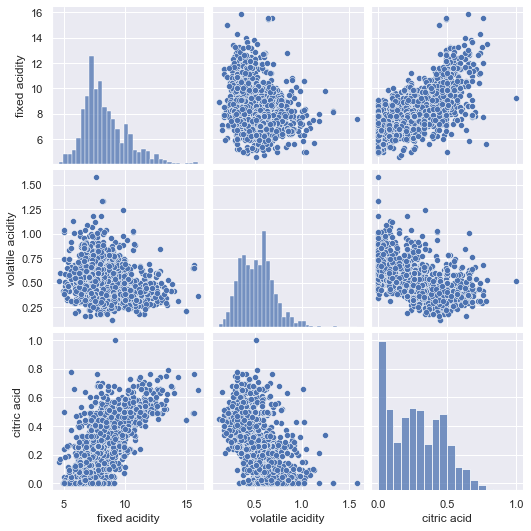

In [41]:
var_list = df.columns[0:3]
sns.pairplot(df[var_list])

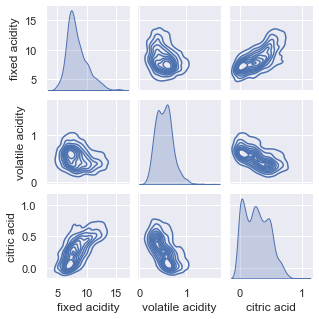

In [44]:
var_list = df.columns[0:3]
sns.pairplot(df[var_list], kind='kde', height=1.5)

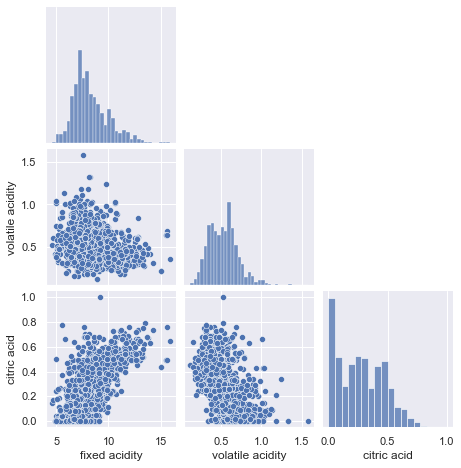

In [48]:
var_list = df.columns[0:3]
sns.pairplot(df[var_list], corner=True, height=2.2)

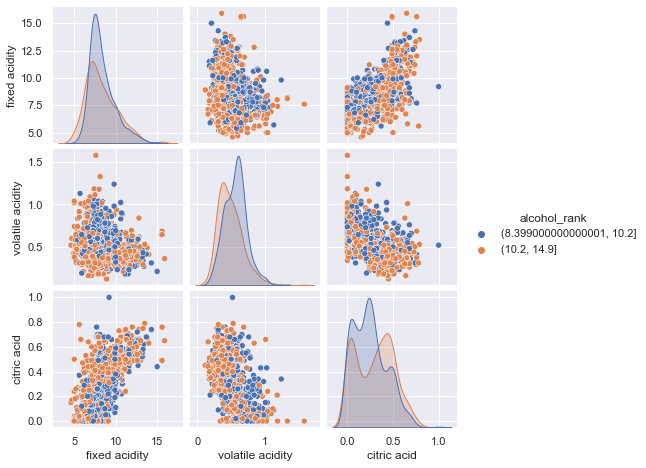

In [55]:
var_list = ['fixed acidity','volatile acidity','citric acid','alcohol_rank']
sns.pairplot(df[var_list], hue='alcohol_rank', height=2.2)

In [ ]:
var_list = df.columns[0:3]
sns.pairplot(df[var_list], corner=True, height=2.2)

## Squarify

In [9]:
import squarify # pip install squarify\
import matplotlib.pyplot as plt

In [16]:
cnt = df['quality'].value_counts()
cnt = pd.DataFrame(cnt)
cnt

,quality
5,681
6,638
7,199
4,53
8,18
3,10


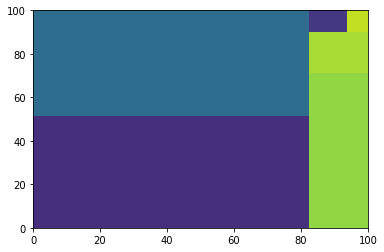

In [18]:
squarify.plot(cnt['quality'])
plt.show()

(0.0, 100.0, 0.0, 100.0)

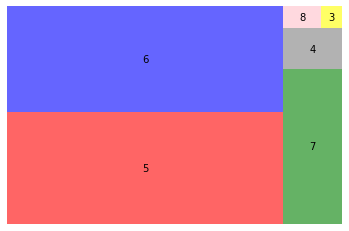

In [32]:
color=['red','blue','green','grey','pink','yellow','black']
squarify.plot(sizes=cnt['quality'], label=cnt.index, alpha=0.6, color = color )
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

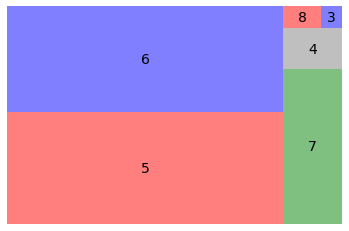

In [27]:

color=['red','blue','green','grey']
squarify.plot(sizes=cnt['quality'], label=cnt.index, alpha=0.5, color = color ,text_kwargs={'fontsize':14})
plt.axis('off')